<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_OLCI_file_structure.ipynb">Understanding OLCI product structure >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

**Ocean and Land Colour Instrument (OLCI):** 

Ocean colour data provide a window into the living ecosystems in our oceans and coastal and inland waters, and measure water quality and sediment dynamics. The Copernicus Sentinel-3 satellites, operated by EUMETSAT on behalf of the European Commission, carry the Ocean and Land Colour Instrument (OLCI). This instrument provides spectral information about the water colour. The main bio-optical parameter retrieved by this instrument is the concentration of phytoplankton, thanks to their photosynthetic pigment – chlorophyll. Phytoplankton are primary producers and the basis of all aquatic life.

Ocean colour data are used to monitor the health of living aquatic ecosystems and the water quality. The data also guide sustainable marine resource management, like fisheries and aquaculture, and coastal management, including of coastal erosion and sedimentation.

Ocean colour data are vital for understanding climate change. Ocean colour is one of the essential climate variables listed by the World Meteorological Organization. Marine ecosystems take up similar amount of atmospheric CO2 as terrestrial ecosystems. This is thanks to the phytoplankton sequestering carbon dioxide (CO2) during photosynthesis, making them important carbon sinks. A carbon sink absorbs more carbon from the atmosphere than it produces. Ocean colour data are used to monitor the annual global uptake of CO2 by the phytoplankton and to further reduce the uncertainty about these estimates.

- Using ocean colour data, we study the wider Earth system, for instance the El Niño/La Niña phenomena and how these impact the ocean ecosystem.

- The data are also useful for looking at more sporadic events, like tracking sediment transport, as well as for detecting and forecasting harmful algal blooms that are a danger to humans, marine and freshwater life and aquaculture.

- OLCI products are available in near-real time, within three hours of sensing. Non-time-critical products are available within one month of sensing. 

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** if you are using or plan to use the EUMETSAT Data Store

There are no prerequisite notebooks for this module.
</div>
<hr>

# 1.1a Accessing OLCI data via the EUMETSAT Data Store 

### Data used

| Product Description  | Data Store collection ID| Product Navigator |
|:--------------------:|:-----------------------:|:-----------------:|
| Sentinel-3 OLCI level-1B full resolution | EO:EUM:DAT:0409 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%201%20Data&s=advanced" target="_blank">link</a> |
| Sentinel-3 OLCI level-2 full resolution  | EO:EUM:DAT:0407 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%202%20Data&s=advanced" target="_blank">link</a> |
| Sentinel-3 OLCI level-2 reduced resolution | EO:EUM:DAT:0408 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:OL_2_WRR___NTC?query=OLCI&filter=satellite__Sentinel-3&filter=instrument__OLCI&filter=processingLevel__Level%202%20Data&s=advanced" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know;
* how to download data from the EUMETSAT Data Store using the <font color="#138D75">**eumetsat data access (eumdac)**</font> client

### Outline

Data from OLCI is available through multiple sources, either via a web user interface (WebUI) or through code and command line interfaces with an Application Programming Interface (API). WebUIs are useful for accessing quick-look data visualisations, and for browsing to see what is available. APIs are more useful for routine, automated and operational data access. Here we will guide you through ways you can access OLCI data through both methods.

Users should note that this notebook will use the [Data Store APIs](#section3) to download <font color="#138D75">**all**</font> of the products required for the lessons in the OLCI introductory module. If you were working on a local machine, using OLCI and other data served directly by the EUMETSAT Data Store, this should be your preferred access method. Users working within the WEkEO environment (i.e. on a WEkEO JupyterHub or virtual machine) should follow the instructions in the companion notebook, <a href="./1_1b_OLCI_data_access_HDA.ipynb">Accessing OLCI data via the WEKEO HDA adaptor</a>, as this will be faster.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Download data via GUIs](#section1)
 1. [The products we need](#section2)
 1. [Downloading via the Data Store API](#section3)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [2]:
import configparser # a library that allows us to parse standard configuration files
import IPython      # a library that helps us display video and HTML content
import os           # a library that allows us access to basic operating system commands like making directories
import json         # a library that helps us make JSON format files
import shutil       # a library that allows us access to basic operating system commands like copy
import zipfile      # a library that allows us to unzip zip-files.
import eumdac       # a tool that helps us download via the eumetsat/data-store

Sometimes we use configuration files to help us set some notebook parameters. The box below reads a configuration file to help us decide how large to make the videos displayed below

In [3]:
config = configparser.ConfigParser()
config["nbook"] = {"v_wd" : "700", "v_ht" : "450"}
if os.path.exists(os.path.join(os.path.dirname(os.getcwd()),"frameworks","config.ini")):
    config.read(os.path.join(os.path.dirname(os.getcwd()),"frameworks","config.ini"))

Next we will create a download directory to store the products we will download in this notebook.

In [4]:
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Downloading data via GUIs
[Back to top](#TOC_TOP)

</div>

### The EUMETSAT Data Store

The <a href="https://data.eumetsat.int" target="_blank">Data Store</a> is EUMETSAT's primary pull service for delivering data, including the ocean data available from Sentinel-3 and OLCI. 

Access to it is possible through a WebUI, and through a series of application programming interfaces (APIs). The Data Store supports browsing, searching and downloading data as well as subscription services. It also provides a link to the online version of the <a href="https://tailor.eumetsat.int/" target="_blank">EUMETSAT Data Tailor</a> for customisation. The video below provides an overview of the Data Store WebUI.

The video below explains how you can access data through the EUMETSAT Data Store WebUI. You can visit and see if you can find OLCI data to download, however this notebook will also show you how to access the Data Store API, facilitated by the EUMDAC client (see the [Downloading via the Data Store API](#section3) section, below).

#### Links:
* <a href="https://data.eumetsat.int" target="_blank">EUMETSAT Data Store</a>
* <a href="https://eumetsatspace.atlassian.net/wiki/spaces/DSDS/overview" target="_blank">More information on the Data Store</a>

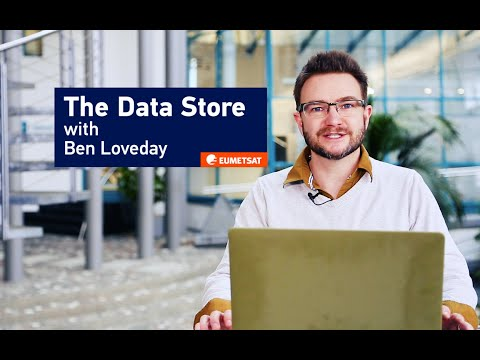

In [5]:
IPython.display.YouTubeVideo('WINakzAZvxw', width=config["nbook"]["v_wd"], height=config["nbook"]["v_ht"])

<div class="alert alert-info" role="alert">

## 2. <a id='section2'></a>The products we need for this module
[Back to top](#TOC_TOP)
    
</div>

We need a number of OLCI level-1b and level-2 products for the notebooks within the introductory part of the learn-olci module. These products are shown below in a python *list* called **product list**. We will retrieve these products from the Data Store.

In [6]:
product_list = [
'S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3',
'S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3',
'S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3'
]

<hr>
<div class="alert alert-info" role="alert">

## 3. <a id='section3'></a>Downloading from the Data Store via API
[Back to top](#TOC_TOP)

</div>

To access Sentinel-3 data from the <a href="https://data.eumetsat.int">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`). If you are working with the recommended Anaconda Python distribution and used the supplied environment file (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

However, you can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac">EUMETSAT gitlab</a>. Please visit the EUMETSAT user support confluence spaces for the the <a href="https://eumetsatspace.atlassian.net/wiki/spaces/DSDS/overview">Data Store</a> and <a href="https://eumetsatspace.atlassian.net/wiki/spaces/EUMDAC/overview">eumdac</a> for more information.

In order to allow us to download data from the Data Store via API, we need to provide our credentials. We can do this in two ways; either by creating a file called `.eumdac_credentials` in our home directory (*option 1 - recommended*) or by supplying our credentials directly in this script (*option 2*). 

#### Option 1: creating  `.eumdac_credentials` in our home directory

For most computer systems the home directory can be found at the path \user\username, /users/username, or /home/username depending on your operating system.

In this file we need to add the following information exactly as follows;

```
{
"consumer_key": "<your_consumer_key>",
"consumer_secret": "<your_consumer_secret>"
}
```

You must replace `<your_consumer_key>` and `<your_consumer_secret>` with the information you extract from https://api.eumetsat.int/api-key/. You will need a <a href="https://eoportal.eumetsat.int/">EUMETSAT Earth Observation Portal account</a> to access this link, and in order to see the information you must click the "Show hidden fields" button at the bottom of the page.

*Note: your key and secret are permanent, so you only need to do this once, but you should take care to never share them*

Make sure to save the file without any kind of extension.

Once you have done this, you can read in your credentials using the commands in the following cell. These will be used to generate a time-limited token, which will refresh itself when it expires.

In [7]:
# Get the home directory of the current user
home_directory = os.path.expanduser("~")

# Construct the full path to the '.eumdac_credentials' file
credentials_path = os.path.join(home_directory, '.eumdac_credentials')

# Print the full path
print(f"The full path to the '.eumdac_credentials' file is: {credentials_path}")

The full path to the '.eumdac_credentials' file is: C:\Users\hp\.eumdac_credentials


In [8]:
# load credentials
with open(os.path.join(os.path.expanduser("~"),'.eumdac_credentials')) as json_file:
    credentials = json.load(json_file)
    token = eumdac.AccessToken((credentials['consumer_key'], credentials['consumer_secret']))
    print(f"This token '{token}' expires {token.expiration}")

# create data store object
datastore = eumdac.DataStore(token)

This token 'c221bffc-237a-37e6-81f5-206f5810457b' expires 2024-07-02 16:55:04.725291


#### Option 2: provide credentials directly

You can provide your credentials directly as follows;

`token = eumdac.AccessToken((consumer_key, consumer_secret))`

*Note: this method is convenient in the short term, but is not really recommended as you have to put your key and secret in this notebook, and run the risk of accidentally sharing them. This method also requires you to authenticate on a notebook-by-notebook basis.*

Once we have a token (by either method described above) we can create a **datastore** 'object' that contains all the collections, and filter this list for those that are relevant to Sentinel-3. The code to the right of the colon is what will tell use the ID for the Sentinel-3 collection we are interested in.

Now we have a token, we can see what OLCI specific collections we have in the Data Store.

In [9]:
datastore = eumdac.DataStore(token)
for collection_id in datastore.collections:
    try:
        if "OLCI" in collection_id.title and "EO:EUM:DAT:0" in str(collection_id):
            print(f"Collection ID({collection_id}): {collection_id.title}")
    except:
        pass

Collection ID(EO:EUM:DAT:0410): OLCI Level 1B Reduced Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0556): OLCI Level 2 Ocean Colour Full Resolution (version BC003) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0557): OLCI Level 2 Ocean Colour Reduced Resolution (version BC003) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0407): OLCI Level 2 Ocean Colour Full Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0408): OLCI Level 2 Ocean Colour Reduced Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0409): OLCI Level 1B Full Resolution - Sentinel-3
Collection ID(EO:EUM:DAT:0577): OLCI Level 1B Full Resolution (version BC002) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0578): OLCI Level 1B Reduced Resolution (version BC002) - Sentinel-3 - Reprocessed


So, for;
* **OLCI Level 1B Full Resolution** we want `collection_id`: **EO:EUM:DAT:0409**.
* **OLCI Level 2 Ocean Colour Reduced Resolution** we want `collection_id`: **EO:EUM:DAT:0408**
* **OLCI Level 2 Ocean Colour Full Resolution** we want `collection_id`: **EO:EUM:DAT:0407**

Lets get some level-1B data first. Below we provide the level-1B `collection_id` to our `datastore` object to choose the correct collection.

In [10]:
collection_id = 'EO:EUM:DAT:0409'
selected_collection = datastore.get_collection(collection_id)

In this case, as we already know what product we want, we can now find the product directly using the **product name**. which in this case the first item in our product list. 

In [11]:
selected_product = datastore.get_product(product_id=product_list[0], collection_id=collection_id)

For more advanced search options using EUMDAC see the notebook on <a href="../2_OLCI_advanced/2_1_OLCI_advanced_data_access_eumdac.ipynb">advanced data access with eumdac</a>.

Now we can download the product. It will go into our download directory *(../products)*.

In [12]:
with selected_product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
    print(f'Downloading {fsrc.name}')
    shutil.copyfileobj(fsrc, fdst)
    print(f'Download of product {fsrc.name} finished.')

Download of product S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3.zip finished.


The product is downloaded as a zip file, so lets unzip it and remove the zip.

In [13]:
with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if file.startswith(str(selected_product)):
            zip_ref.extract(file, download_dir)
    print(f'Unzipping of product {selected_product} finished.')
os.remove(fdst.name)

Unzipping of product S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3 finished.


You can now check the **products** directory to see that we have the level 1B file. Now, lets pull all the parts together and download both level 2 files in a single loop.

In [14]:
collection_ids = ["EO:EUM:DAT:0408", "EO:EUM:DAT:0407"]

for product_id, collection_id in zip(product_list[1:],collection_ids):
    print(f"Retrieving: {product_id}")

    selected_collection = datastore.get_collection(collection_id)
    selected_product = datastore.get_product(product_id=product_id, collection_id=collection_id)
    
    with selected_product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
        print(f'Downloading {fsrc.name}.')
        shutil.copyfileobj(fsrc, fdst)
        print(f'Download of product {fsrc.name} finished.')

    with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
        for file in zip_ref.namelist():
            if file.startswith(str(selected_product)):
                zip_ref.extract(file, download_dir)
        print(f'Unzipping of product {fdst.name} /n finished.')

    os.remove(fdst.name) 

Retrieving: S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3
Download of product S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3.zip finished.
Unzipping of product d:\Arun 2022\Github\EUMETSET-courses\Sentinel-3_OLCI\1_OLCI_introductory\products\S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3.zip /n finished.
Retrieving: S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3
Download of product S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3.zip finished.
Unzipping of product d:\Arun 2022\Github\EUMETSET-courses\Sentinel-3_OLCI\1_OLCI_introductory\products\S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3.zip /n finished.


If you have completed this section, you can now continue to work through the rest of the notebooks in the **introductory repository** and learn more about working with OLCI data. Alternatively, if you'd like to learn more about using the advanced functionality of EUMDAC to access OLCI data you can check out the advanced workflows in the <a href="../2_OLCI_advanced/2_1_OLCI_advanced_data_access_eumdac.ipynb">advanced data access with eumdac</a> notebook. 

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_OLCI_file_structure.ipynb">Understanding OLCI product structure >></a>
<hr>

<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>